## 트위터 데이터 네트워크 분석 
- Google 및 Youtube에 있는 자료를 참고했습니다.

### 필요한 패키지 설치 

In [1]:
import numpy
import tweepy
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
from apyori import apriori

### 트위터 토큰 기반 API 접근 

In [2]:
consumer_key = "ardDYLNG7t09KDYejljL5qE7X"  #API key 
consumer_secret = "4OmM4j202q4DvIfbGHhYIv8bpU9ZEubwxdvALC8kgVRzGuSE6j"  #API secret key 
access_token = "1123119099498749952-wkWjZEtKHX2Hhbjni7zQN2kPh38uWC"     #Access token
access_token_secret = "rP8FjWkbPwN5jMRKVG0yQvHMnnqL74Fz1ysYvzjjsCCKT"    #Access token secert
 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


### 검색 키워드 정의 

In [16]:
keyword = "코로나"
tweets = api.search(keyword)

for tweet in tweets : 
    print(tweet.entities['user_mentions'])
    print(tweet.entities['hashtags'])
    print(tweet.text)

[{'screen_name': 'adorablegncd', 'name': '2', 'id': 1281488182836510720, 'id_str': '1281488182836510720', 'indices': [3, 16]}]
[]
RT @adorablegncd: 비대면콘서트않좋은점
무대끝나고 조명이꺼지는데...
그래서화면이까매지면 흥분과두근거림과벅참으로가득찬내얼굴이랑 눈이마주침 진짜개수치스러움
[{'screen_name': 'adorablegncd', 'name': '2', 'id': 1281488182836510720, 'id_str': '1281488182836510720', 'indices': [3, 16]}]
[]
RT @adorablegncd: 비대면콘서트않좋은점
무대끝나고 조명이꺼지는데...
그래서화면이까매지면 흥분과두근거림과벅참으로가득찬내얼굴이랑 눈이마주침 진짜개수치스러움
[{'screen_name': 'adorablegncd', 'name': '2', 'id': 1281488182836510720, 'id_str': '1281488182836510720', 'indices': [3, 16]}]
[]
RT @adorablegncd: 비대면콘서트않좋은점
무대끝나고 조명이꺼지는데...
그래서화면이까매지면 흥분과두근거림과벅참으로가득찬내얼굴이랑 눈이마주침 진짜개수치스러움
[{'screen_name': 'adorablegncd', 'name': '2', 'id': 1281488182836510720, 'id_str': '1281488182836510720', 'indices': [3, 16]}]
[]
RT @adorablegncd: 비대면콘서트않좋은점
무대끝나고 조명이꺼지는데...
그래서화면이까매지면 흥분과두근거림과벅참으로가득찬내얼굴이랑 눈이마주침 진짜개수치스러움
[]
[]
하 뭐여 추석 전에 대면 일주일하고 그 후 비대면 아님 격주라니 슷밥ㅂ 이게 뭔
[{'screen_name': 'adorablegncd', 'name': '2', 'id': 12814

### 크롤링데이터 데이터프레임 변환 

In [4]:
columns = ['created', 'tweet_text']
df = pd.DataFrame(columns = columns)

for i in range(1,100) :
    for tweet in tweets : 
        tweet_text = tweet.text
        created = tweet.created_at
        row = [created, tweet_text]
        series = pd.Series(row, index = df.columns)
        df = df.append(series, ignore_index=True)
        
print("Get data 100% complete")  #반복문 완료 문구

Get data 100% complete


### CSV파일로 저장 후 읽어오기

In [5]:
df.to_csv("tweet_temp.csv", index=False)
df = pd.read_csv("tweet_temp.csv")
df.head()

,created,tweet_text
0,2020-09-14 16:54:25,맘에 안들어하는거같아서 조금 더 수정해봤어!\r\n@Hyaruming \r\n\r\...
1,2020-09-14 16:54:14,@swan_listening ㄹㅇ 코로나와함께서브컬쳐대부흥이옴....ㅋㅋㅋ\r\n존...
2,2020-09-14 16:54:08,"RT @jsgo747: 🔯코로나 없는 세상, 맑은 세상을\r\n만드는 아름다운 세계..."
3,2020-09-14 16:54:07,@Jae_Day6 제형아 ....코로나 조심해 ..
4,2020-09-14 16:54:07,RT @hanitweet: 코로나 사태가 발생한 이후 청년층의 정신건강에 빨간불이 ...


### 텍스트 데이터 전처리 

In [6]:
def text_cleaning(text) : 
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,2020-09-14 16:54:25,맘에 안들어하는거같아서 조금 더 수정해봤어!\r\n@Hyaruming \r\n\r\...,맘에 안들어하는거같아서 조금 더 수정해봤어 코로나가 날 살리네 개꿀
1,2020-09-14 16:54:14,@swan_listening ㄹㅇ 코로나와함께서브컬쳐대부흥이옴....ㅋㅋㅋ\r\n존...,ㄹㅇ 코로나와함께서브컬쳐대부흥이옴ㅋㅋㅋ존나기묘 ㅋㅋㅋㅋㅋㅋㅋㅋ
2,2020-09-14 16:54:08,"RT @jsgo747: 🔯코로나 없는 세상, 맑은 세상을\r\n만드는 아름다운 세계...",코로나 없는 세상 맑은 세상을만드는 아름다운 세계로허경영하늘궁 라이브 방송실시간...
3,2020-09-14 16:54:07,@Jae_Day6 제형아 ....코로나 조심해 ..,제형아 코로나 조심해
4,2020-09-14 16:54:07,RT @hanitweet: 코로나 사태가 발생한 이후 청년층의 정신건강에 빨간불이 ...,코로나 사태가 발생한 이후 청년층의 정신건강에 빨간불이 켜졌다 년 상반기 청년층...


### konlpy를 활용한 키워드 추출

In [7]:
korea_stopwords_path = "korea_stopword100.txt"
with open(korea_stopwords_path, encoding = 'utf8') as f : 
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x) :
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    #한글자 키워드 제거 
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    #불용어 제거 
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [8]:
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))

### 트위터 연관 키워드 분석 

In [19]:
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] #공백 문자 제거 

AttributeError: 'list' object has no attribute 'head'

### 연관 관련 수치 적용

In [1]:
results = list(apriori(transactions,
                       min_support = 0.1,
                       min_confidence = 0.2,
                       min_lift = 5, 
                       max_length = 2))                      

NameError: name 'apriori' is not defined

### 데이터프레임 정리 

In [11]:
columns = ['source','target','support']
network_df = pd.DataFrame(columns=columns)

#각 열로 변환 
for result in results : 
    if len(result.items) == 2 :
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index = network_df.columns)
        network_df = network_df.append(series, ignore_index = True)
network_df.head(10)

,source,target,support
0,관심,뭔가,0.200000
1,관심,사고,0.200000
2,관심,사실,0.133333
3,관심,앨범,0.200000
4,관심,약간,0.200000
5,관심,연습,0.200000
6,관심,작업,0.200000
7,관심,저희,0.133333
8,관심,콘서트,0.200000
9,방역,다시,0.133333


### 말뭉치 추출 

In [ ]:
tweet_corpus = "".join(df['ko_text'].tolist())
print(tweet_corpus)

### 단어 추출 및 한 글자 제거

In [13]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)
 
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'코로나': 1485, '뭔가': 396, '관심': 396, '이후': 297, '콘서트': 297, '앨범': 297, '연습': 297, '작업': 297, '약간': 297, '사고': 297, '미터': 297, '방역': 297, '상황': 297, '조금': 198, '세상': 198, '발생': 198, '청년': 198, '기간': 198, '사실': 198, '저희': 198, '진자': 198, '다시': 198, '며칠': 198, '사람': 198, '무조건': 198, '최하': 198, '이상': 198, '좀비': 198, '확률': 198, '매우': 198, '스트리밍': 198, '살롱': 198, '수정': 99, '개꿀': 99, '서브컬쳐': 99, '부흥': 99, '존나': 99, '기묘': 99, '맑은': 99, '세계': 99, '허경영': 99, '하늘': 99, '라이브': 99, '방송': 99, '실시간': 99, '독자': 99, '형아': 99, '사태': 99, '정신건강': 99, '상반기': 99, '자해': 99, '진료': 99, '수가': 99, '지난해': 99, '견줘': 99, '가까이': 99, '왜냐면': 99, '음악': 99, '이외': 99, '현재': 99, '이제': 99, '이스라엘': 99, '증가': 99, '봉쇄': 99, '실시': 99, '반경': 99, '이내': 99, '외출': 99, '허용': 99, '모든': 99, '상가': 99, '철시': 99, '슈퍼마켓': 99, '약국': 99, '예외': 99, '정부': 99, '적극': 99, '협조': 99, '경제': 99, '수석': 99, '통신비': 99, '편성': 99, '이유': 99, '대면': 99, '온라인': 99, '학습': 99, '근무': 99, '경제활동': 99, '때문': 99, '무선통신': 99, '일종': 99, '필수': 99, '로써': 99, '역

### 단어 빈도 점수 추가

In [17]:
node_df = pd.DataFrame(list(remove_char_counter.items()), columns = ['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 100]  #99인 값이 많으므로 100 적용
node_df.head()

,node,nodesize
0,조금,198
2,코로나,1485
8,세상,198
19,발생,198
20,이후,297


### 네트워크 그래프 시각화

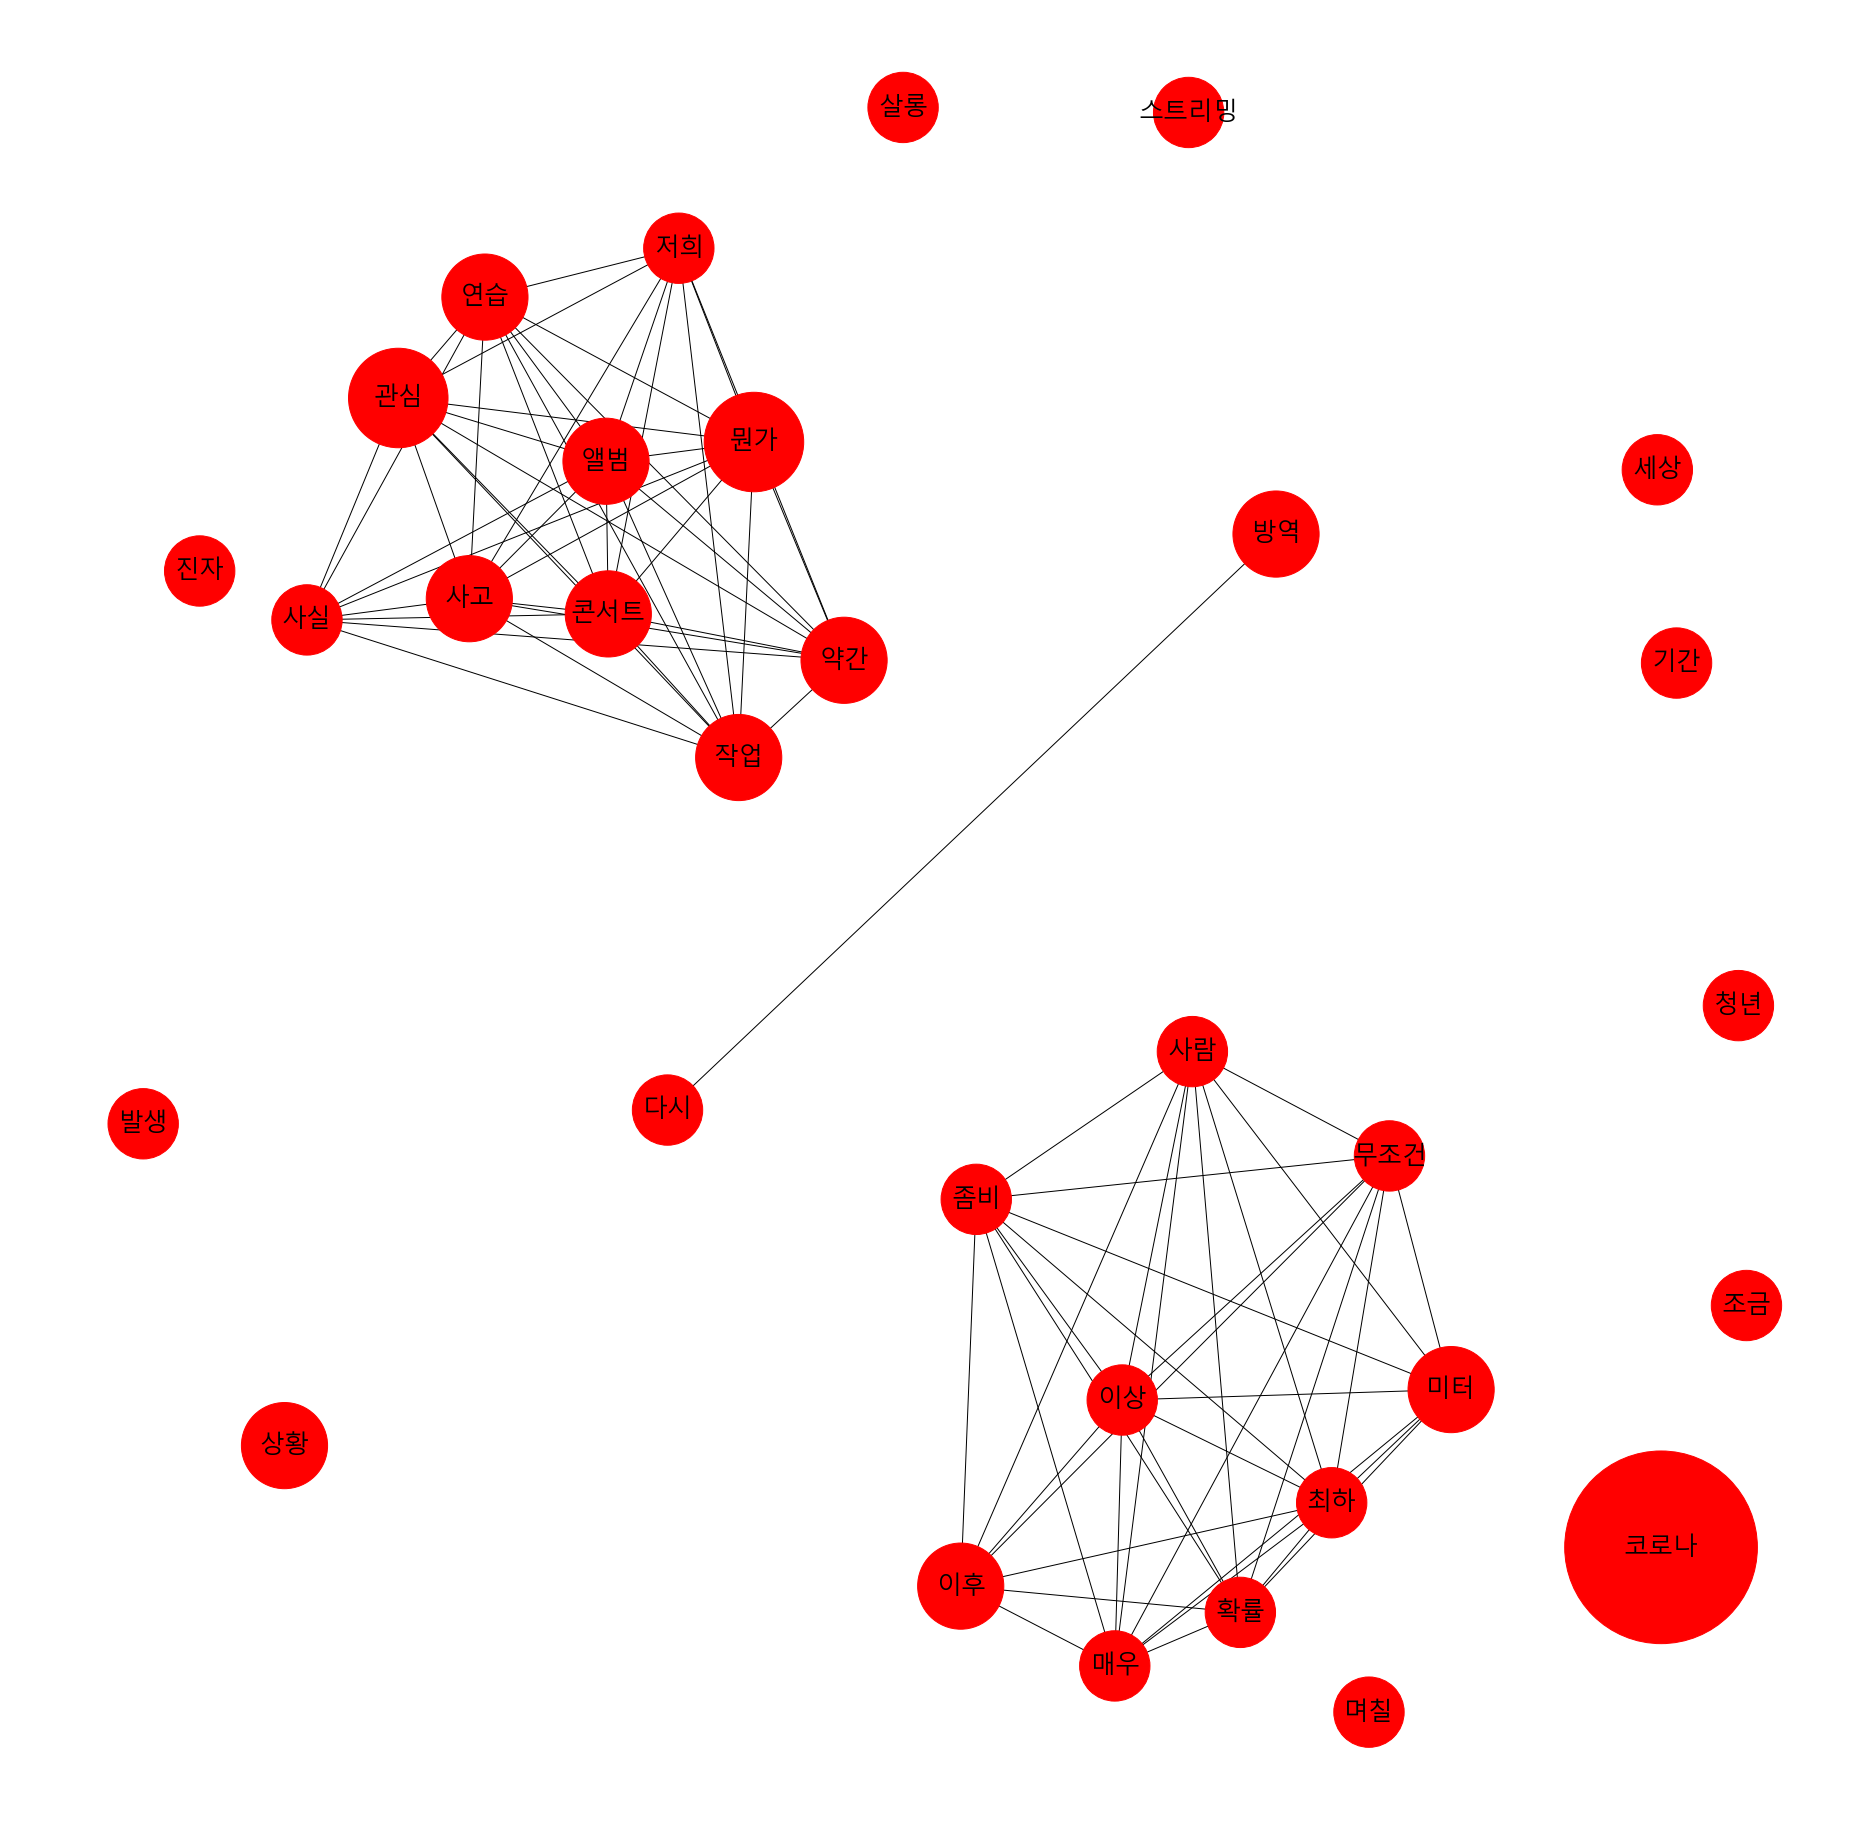

In [18]:
plt.figure(figsize=(25,25))

#네트워크 그래프 객체 생성
G = nx.Graph()
for index, row in node_df.iterrows() :
    G.add_node(row['node'], nodesize = row['nodesize'])

for index, row in network_df.iterrows() : 
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

#그래프 디자인 
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.node[node]['nodesize'] * 25 for node in G]
nx.draw(G, pos = pos, node_size = sizes)
nx.draw_networkx_labels(G, pos=pos, font_family = "Malgun Gothic", font_size = 25)

ax = plt.gca()
plt.show()
